<a href="https://colab.research.google.com/github/LuisFelipeOrtolan/QuarentenaDados-Alura/blob/master/Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as Bibliotecas


In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt

Obtendo a base de dados dos filmes do MovieLens


In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeID","titulo","generos"]


Obtendo a base de dados de avaliações do MovieLens


In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioID","filmeID", "nota", "momento"]

Obtendo a média da avaliação de cada filme

In [0]:
notas_medias_por_filme = avaliacoes.groupby("filmeID")["nota"].mean()

Juntando os filmes com a média de avaliação de cada filme!

In [0]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeID")
filmes_com_media.rename(columns = {"nota":"nota_media"}, inplace = True)
filmes_com_media = filmes_com_media.round({'nota_media':2})

Determinando os filmes que não possuem avaliação

In [0]:
filmes_sem_nota = filmes_com_media[filmes_com_media.isnull().any(axis=1)]
filmes_sem_nota

,filmeID,titulo,generos,nota_media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


Contando quantas avaliações cada filme teve

In [0]:
votos_por_filme = avaliacoes.groupby("filmeID")["nota"].count()
votos_por_filme = votos_por_filme.rename("votos_por_filme")

filmes_com_media_e_votos = filmes_com_media.join(votos_por_filme, on="filmeID")
filmes_com_media_e_votos.head()

,filmeID,titulo,generos,nota_media,votos_por_filme
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


Separando os gêneros do filme

In [0]:
generos = filmes_com_media_e_votos.generos.str.split(pat = '|', expand = True)
generos = generos.apply(pd.value_counts)
generos = generos.sum(axis=1)

Criando um dataframe com as informações coletadas

In [0]:
data = {'Generos':generos.index, 'Vezes Citados':generos}
df_generos = pd.DataFrame(data)
df_generos = df_generos.reset_index()
df_generos.drop(columns = ['index'], inplace = True)

Mostrando os gêneros

In [0]:
print(df_generos['Generos'])

0     (no genres listed)
1                 Action
2              Adventure
3              Animation
4               Children
5                 Comedy
6                  Crime
7            Documentary
8                  Drama
9                Fantasy
10             Film-Noir
11                Horror
12                  IMAX
13               Musical
14               Mystery
15               Romance
16                Sci-Fi
17              Thriller
18                   War
19               Western
Name: Generos, dtype: object


Mostrando o número de filmes que cada um foi classificado

In [0]:
print(df_generos)

               Generos  Vezes Citados
0   (no genres listed)           34.0
1               Action         1828.0
2            Adventure         1263.0
3            Animation          611.0
4             Children          664.0
5               Comedy         3756.0
6                Crime         1199.0
7          Documentary          440.0
8                Drama         4361.0
9              Fantasy          779.0
10           Film-Noir           87.0
11              Horror          978.0
12                IMAX          158.0
13             Musical          334.0
14             Mystery          573.0
15             Romance         1596.0
16              Sci-Fi          980.0
17            Thriller         1894.0
18                 War          382.0
19             Western          167.0


Plotando os gêneros e número de vezes listados

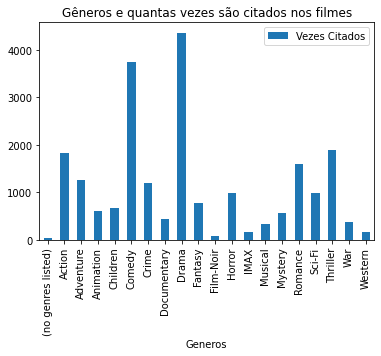

In [0]:
df_generos.plot(x = 'Generos', y = 'Vezes Citados', kind = 'bar', title = "Gêneros e quantas vezes são citados nos filmes")